# **Sentiment Analysis of Tweets using NLP**

**Analyzing and Preparation of data**

In [ ]:
#importing necessary libraries
import pandas as pd
import seaborn as sns

In [ ]:
#reading the data
df=pd.read_csv('/content/drive/MyDrive/dataset2/twitter_validation.csv',names=['Id','Location','Target','Text'])
import warnings
warnings.filterwarnings('ignore')
df

,Id,Location,Target,Text
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
...,...,...,...,...
995,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
996,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Id        1000 non-null   int64 
 1   Location  1000 non-null   object
 2   Target    1000 non-null   object
 3   Text      1000 non-null   object
dtypes: int64(1), object(3)
memory usage: 31.4+ KB


In [ ]:
#value counts of the target column
df['Target'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Target, dtype: int64

<Axes: xlabel='Target', ylabel='count'>

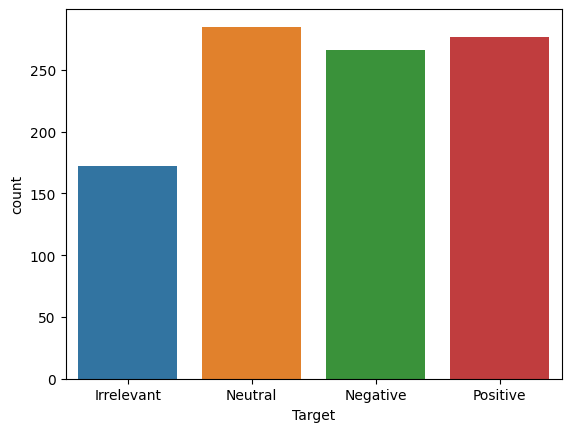

In [ ]:
#countplot of target
sns.countplot(x='Target',data=df)

In [ ]:
#dropping the rows with target value irrelevant
# df.drop(df(df['Target']=='Irrelevant').index,axis=0,inplace=True)

df1 = df[df['Target'] != 'Irrelevant']

In [ ]:
df1

,Id,Location,Target,Text
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...
5,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
993,314,Amazon,Negative,Please explain how this is possible! How can t...
994,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
997,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
998,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
df1.reset_index(inplace=True,drop=True)
df1

,Id,Location,Target,Text
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
823,314,Amazon,Negative,Please explain how this is possible! How can t...
824,9701,PlayStation5(PS5),Positive,Good on Sony. As much as I want to see the new...
825,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
826,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#drop unwanted columns
df1.drop(['Id','Location'],axis=1,inplace=True)
df1

,Target,Text
0,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,Negative,@Microsoft Why do I pay for WORD when it funct...
2,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,Neutral,Now the President is slapping Americans in the...
4,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,Negative,Please explain how this is possible! How can t...
824,Positive,Good on Sony. As much as I want to see the new...
825,Positive,Today sucked so it’s time to drink wine n play...
826,Positive,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#mapping target values to numeric
df1['Target']=df1['Target'].map({'Positive':1,'Negative':-1,'Neutral':0})
df1

,Target,Text
0,0,BBC News - Amazon boss Jeff Bezos rejects clai...
1,-1,@Microsoft Why do I pay for WORD when it funct...
2,-1,"CSGO matchmaking is so full of closet hacking,..."
3,0,Now the President is slapping Americans in the...
4,-1,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...
823,-1,Please explain how this is possible! How can t...
824,1,Good on Sony. As much as I want to see the new...
825,1,Today sucked so it’s time to drink wine n play...
826,1,Bought a fraction of Microsoft today. Small wins.


In [ ]:
#setting the tweets columns as input
tweets=df1.Text
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking,...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I’ve had Madeleine McCann in my cel...
                             ...                        
823    Please explain how this is possible! How can t...
824    Good on Sony. As much as I want to see the new...
825    Today sucked so it’s time to drink wine n play...
826    Bought a fraction of Microsoft today. Small wins.
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

In [ ]:
#downloading necessary packages
import nltk
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

**Tokenization**

In [ ]:
from nltk import TweetTokenizer
tk=TweetTokenizer()
tweets=tweets.apply(lambda line:tk.tokenize(line)).apply(lambda token:' '.join(token))
tweets

0      BBC News - Amazon boss Jeff Bezos rejects clai...
1      @Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi @EAHelp I ’ ve had Madeleine McCann in my c...
                             ...                        
823    Please explain how this is possible ! How can ...
824    Good on Sony . As much as I want to see the ne...
825    Today sucked so it ’ s time to drink wine n pl...
826    Bought a fraction of Microsoft today . Small w...
827    Johnson & Johnson to stop selling talc baby po...
Name: Text, Length: 828, dtype: object

**Removing the special characters**

In [ ]:
tweets=tweets.str.replace('[^a-zA-Z0-9]+',' ')
tweets

0      BBC News Amazon boss Jeff Bezos rejects claims...
1       Microsoft Why do I pay for WORD when it funct...
2      CSGO matchmaking is so full of closet hacking ...
3      Now the President is slapping Americans in the...
4      Hi EAHelp I ve had Madeleine McCann in my cell...
                             ...                        
823    Please explain how this is possible How can th...
824    Good on Sony As much as I want to see the new ...
825    Today sucked so it s time to drink wine n play...
826     Bought a fraction of Microsoft today Small wins 
827    Johnson Johnson to stop selling talc baby powd...
Name: Text, Length: 828, dtype: object

**Stemming**

In [ ]:
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer('english')
tweets=tweets.apply(lambda line:[stemmer.stem(token.lower()) for token in tk.tokenize(line)]).apply(lambda token:' '.join(token))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi do i pay for word when it functi...
2      csgo matchmak is so full of closet hack it s a...
3      now the presid is slap american in the face th...
4      hi eahelp i ve had madelein mccann in my cella...
                             ...                        
823    pleas explain how this is possibl how can they...
824    good on soni as much as i want to see the new ...
825    today suck so it s time to drink wine n play b...
826       bought a fraction of microsoft today small win
827    johnson johnson to stop sell talc babi powder ...
Name: Text, Length: 828, dtype: object

**Stopwords removal**

In [ ]:
from nltk.corpus import stopwords
sw=stopwords.words('english')
tweets=tweets.apply(lambda line:[token for token in tk.tokenize(line) if token not in sw]).apply(lambda token:' '.join(token))
tweets

0      bbc news amazon boss jeff bezo reject claim co...
1      microsoft whi pay word function poor samsungus...
2           csgo matchmak full closet hack truli aw game
3      presid slap american face realli commit unlaw ...
4      hi eahelp madelein mccann cellar past 13 year ...
                             ...                        
823    pleas explain possibl let compani overcharg sc...
824    good soni much want see new ps5 go right much ...
825    today suck time drink wine n play borderland s...
826            bought fraction microsoft today small win
827    johnson johnson stop sell talc babi powder u c...
Name: Text, Length: 828, dtype: object

**Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec=TfidfVectorizer()
data=vec.fit_transform(tweets)
print(data)

  (0, 734)	0.2456282916977699
  (0, 521)	0.2456282916977699
  (0, 3599)	0.19717097284763976
  (0, 878)	0.11802111433875656
  (0, 1055)	0.2456282916977699
  (0, 1184)	0.22139963227270484
  (0, 2088)	0.12503547156807654
  (0, 342)	0.2135997461023189
  (0, 907)	0.16343698819954885
  (0, 852)	0.2018385048310212
  (0, 2878)	0.2456282916977699
  (0, 607)	0.2456282916977699
  (0, 1915)	0.23145543449136263
  (0, 674)	0.2135997461023189
  (0, 412)	0.14270670271218175
  (0, 2389)	0.365996231282465
  (0, 576)	0.46291086898272527
  (1, 842)	0.4055823664694651
  (1, 3014)	0.4055823664694651
  (1, 2670)	0.3821800909185634
  (1, 1469)	0.4055823664694651
  (1, 3819)	0.36557591217188057
  (1, 2572)	0.3126902562590763
  (1, 3778)	0.26216072802580975
  (1, 2251)	0.24555654927912696
  :	:
  (825, 672)	0.22981061112100945
  (825, 1048)	0.2315686698425631
  (825, 3502)	0.21750175079084832
  (825, 3352)	0.2904718522758868
  (825, 2638)	0.17148706662740873
  (826, 1444)	0.5079831062080814
  (826, 3195)	0.4786

In [ ]:
#checking for the shape of the data
data.shape

(828, 3929)

In [ ]:
#eg:
    #  0     1  2    3     4      5   6   7     8       9          3929
    # earth is the third planet from the sun jupiter largest
#S0
#S1
#828

In [ ]:
#setting data as the X
X=data

In [ ]:
#setting target column as y
y=df1['Target']

**train test splitting**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

**Model Building, Evaluation and new Prediction**

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report,accuracy_score,ConfusionMatrixDisplay
sv=SVC()
nb=MultinomialNB()
rf=RandomForestClassifier()
ab=AdaBoostClassifier()
models=[sv,nb,rf,ab]
for model in models:
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print('\n\n',model,'\n\n')
  print(classification_report(y_test,y_pred))
  y_new=model.predict(vec.transform(['This look kinda is clean']))
  print('new prediction:',y_new)



 SVC() 


              precision    recall  f1-score   support

          -1       0.60      0.72      0.65        74
           0       0.64      0.64      0.64        91
           1       0.66      0.55      0.60        84

    accuracy                           0.63       249
   macro avg       0.63      0.63      0.63       249
weighted avg       0.63      0.63      0.63       249

new prediction: [1]


 MultinomialNB() 


              precision    recall  f1-score   support

          -1       0.59      0.73      0.65        74
           0       0.63      0.53      0.57        91
           1       0.60      0.58      0.59        84

    accuracy                           0.61       249
   macro avg       0.61      0.61      0.61       249
weighted avg       0.61      0.61      0.60       249

new prediction: [1]


 RandomForestClassifier() 


              precision    recall  f1-score   support

          -1       0.49      0.72      0.58        74
           0       0.64 

Since the dataset is small, the accuracy will have limits. Although got correct predictions using SVC and MultinomialNB